# PROJECT 2 - DATA 200

## Linh Nguyen May 2nd 2025

### Task 1

#### 1.

In [74]:
import pandas as pd
import sqlalchemy as sa
import os.path
# Project Outline:
# This Jupyter notebook showcases two key data analytics functions using IMDb movie data:
# 1. avg_genre(): - Analyzes and visualizes average IMDb ratings by genre over a specific time range.
# 2. top_director_movies(): Displays the top-rated films (15) by a given director.
# Both functions leverage SQL queries on a relational database and present the results through 2 visualizations.
# The notebook is intended for audiences including hiring managers, professors, or collaborators interested in this type of data.

In [75]:
protocol = "sqlite"
driver = "pysqlite"
dbdir = "dbfiles"
database = "imdb"

cstring = f"{protocol}+{driver}:///{os.path.join(dbdir, database + '.db')}"
print(cstring)

sqlite+pysqlite:///dbfiles/imdb.db


In [76]:
file_name = 'imdb.db'
filepath = "/Users/linhnom/Downloads/imdb.db"
import sqlite3
connection = sqlite3.connect(filepath)

/var/folders/9j/p7_fk1hj553f2kc_qwc90c8m0000gn/T/ipykernel_54236/1883492223.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='avg_rating', y='genres', palette='viridis')


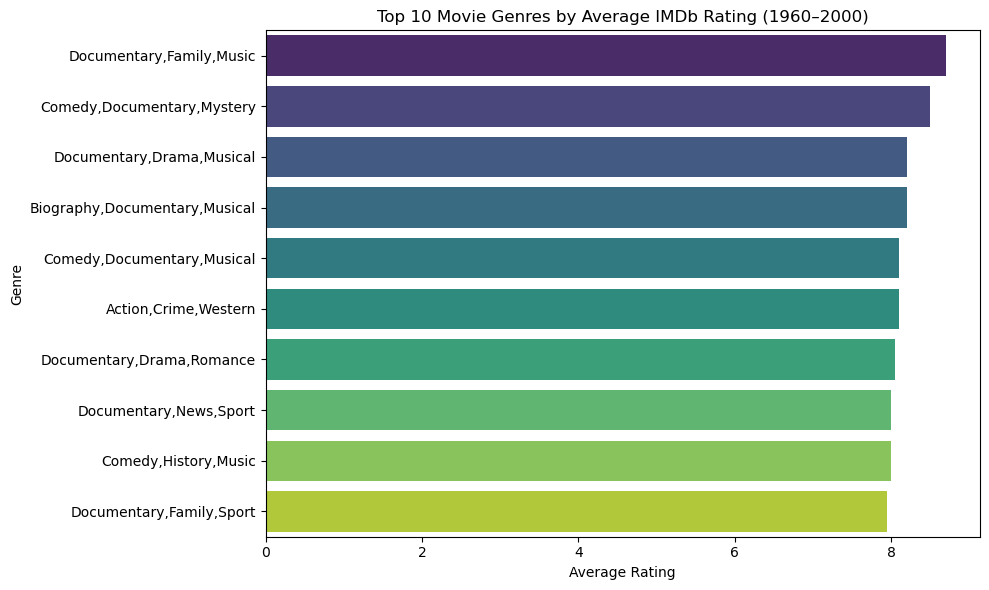

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
#Function 1: Top IMDb Genres For a Certain Time Period
def avg_genre(conn, start_year, end_year):
    query = '''
    SELECT
        t.genres,
        ROUND(AVG(r.rating), 2) AS avg_rating
    FROM
        titles t
    JOIN ratings r ON t.title_id = r.title_id
    WHERE
        t.premiered BETWEEN ? AND ?
        AND t.genres IS NOT NULL
        AND t.type = 'movie'
    GROUP BY
        t.genres
    ORDER BY avg_rating DESC
    '''
    # Execute query and store results in DataFrame
    df = pd.read_sql_query(query, conn, params=(start_year, end_year))

    # Keep only the top 10 genres
    top_10 = df.head(10)
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_10, x='avg_rating', y='genres', palette='viridis')
    plt.title(f"Top 10 Movie Genres by Average IMDb Rating ({start_year}–{end_year})")
    plt.xlabel("Average Rating")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()
avg_genre(connection, 1960, 2000)   #Shows result of the years from 1960 - 2000

/var/folders/9j/p7_fk1hj553f2kc_qwc90c8m0000gn/T/ipykernel_54236/2681984351.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


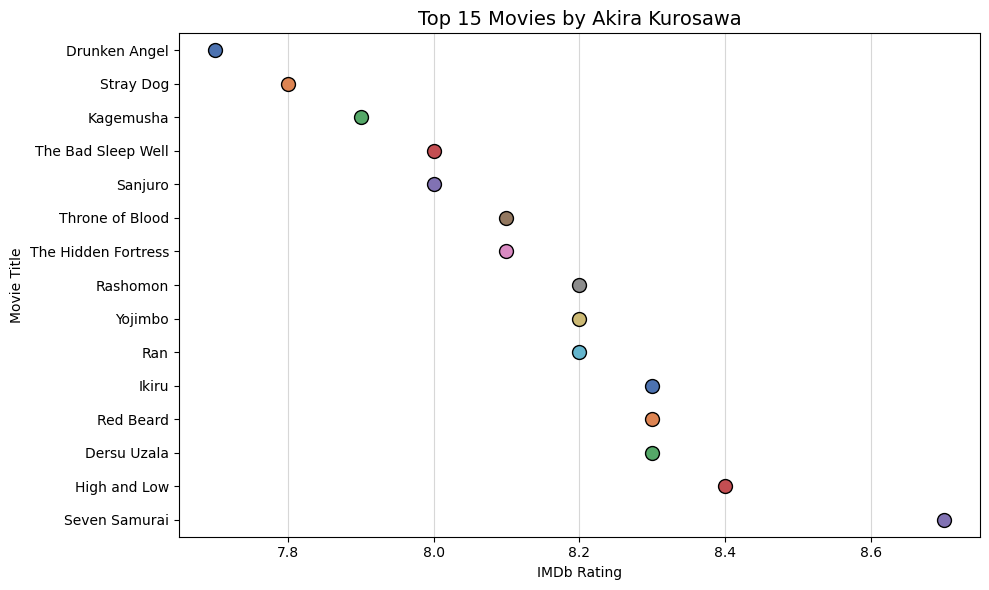

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
#Function 2: Top Movies by a Director
def top_director_movies(conn, director_name, limit=15):
    query = """
        SELECT
            t.primary_title AS title,
            r.rating AS rating
        FROM titles t
        JOIN ratings r ON t.title_id = r.title_id
        JOIN crew c ON t.title_id = c.title_id
        JOIN people p ON c.person_id = p.person_id
        WHERE t.type = 'movie'
          AND c.category = 'director'
          AND p.name = ?
        ORDER BY r.rating DESC
        LIMIT ?
    """
    # Execute query and store results in DataFrame
    df = pd.read_sql_query(query, conn, params=(director_name, limit))
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.stripplot(
        data=df.sort_values("rating", ascending=True),
        x='rating',
        y='title',
        palette='deep',
        size=10,
        linewidth=1,
        edgecolor='black',
        orient='h'
    )
    plt.title(f"Top {limit} Movies by {director_name}", fontsize=14)
    plt.xlabel("IMDb Rating")
    plt.ylabel("Movie Title")
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()
    plt.show()
top_director_movies(conn, "Akira Kurosawa", limit=15)

In [ ]:
# The avg_genre() function reveals how certain genres consistently earn higher ratings
# In my example (1960–2000), critically acclaimed genres like Documentary, Biography, or Drama often lead,
# while genres such as Horror or Action may appear lower. This suggests a correlation between genre and critical success.
# The top_director_movies() function provides valuable insight into a director’s most acclaimed works.
# For instance, applying the function to Akira Kurosawa demonstrates a remarkable consistency in his film quality
# and highlights classics such as Seven Samurai and Rashomon. Changing the director name will give you different results.
# These tools not only serve academic analysis but can help industry professionals understand market trends,
# audience preferences, and curatorial strategies for film festivals or platforms. It can also introduce new people to the industry since the
#data is easy to comprehend.
